In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("./2019-Nov.csv")

In [4]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [5]:
df.describe()

,product_id,category_id,price,user_id
count,4.635837e+06,4.635837e+06,4.635837e+06,4.635837e+06
mean,5.481406e+06,1.550049e+18,8.120701e+00,5.068070e+08
std,1.305582e+06,1.642371e+17,1.879197e+01,8.504375e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,1.120748e+06
25%,5.723529e+06,1.487580e+18,1.940000e+00,4.698573e+08
50%,5.810145e+06,1.487580e+18,3.970000e+00,5.421750e+08
75%,5.856186e+06,1.487580e+18,6.350000e+00,5.680491e+08
max,5.909246e+06,2.195085e+18,3.277800e+02,5.799699e+08


In [6]:
df.shape

(4635837, 9)

In [8]:
df.duplicated().sum()

246693

In [9]:
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [16]:
df['event_time'].min()

Timestamp('2019-11-01 00:00:02+0000', tz='UTC')

In [13]:
df['event_time'] = pd.to_datetime(df['event_time'], format="%Y-%m-%d %H:%M:%S %Z")

In [14]:
df.dtypes

event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                        float64
user_id                        int64
user_session                  object
dtype: object

In [15]:
df.drop_duplicates(inplace=True)

In [17]:
Q3 = df['price'].quantile(0.75)

In [18]:
Q1 = df['price'].quantile(0.25)

In [19]:
IQR = Q3 - Q1

In [24]:
lower = Q1 - 1.5*IQR
lower

-5.025

In [25]:
upper_bound = Q3 + 1.5*IQR
upper_bound

13.655000000000001

In [41]:
x = df['event_type'].unique()

In [42]:
y = df['event_type'].value_counts()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Tipos de eventos')

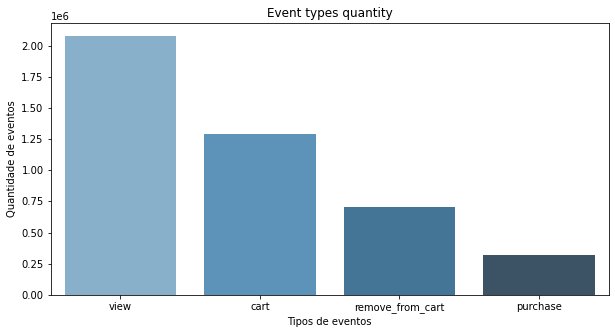

In [46]:
plt.figure(figsize=(10,5))
plt.title('Event types quantity')
sns.barplot(x, y, palette="Blues_d")
plt.ylabel('Quantidade de eventos')
plt.xlabel('Tipos de eventos')

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Tipos de eventos')

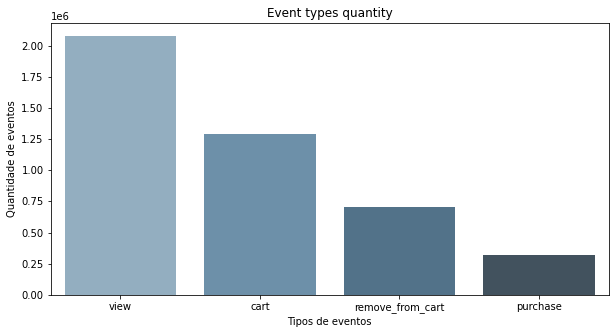

In [45]:
plt.figure(figsize=(10,5))
plt.title('Event types quantity')
sns.barplot(x, y, saturation=0.5, order=['view', 'cart', 'remove_from_cart', 'purchase'], palette="Blues_d")
plt.ylabel('Quantidade de eventos')
plt.xlabel('Tipos de eventos')

In [71]:
contagem_marcas = df['brand'].value_counts()
contagem_marcas

runail       304915
grattol      192985
irisk        191367
masura       173282
bpw.style    123356
              ...  
shifei            3
macadamia         2
footlogix         2
dessata           2
ibd               1
Name: brand, Length: 239, dtype: int64

In [75]:
mais_vendidas = contagem_marcas.loc[['runail', 'grattol', 'irisk', 'masura', 'bpw.style']]
mais_vendidas

runail       304915
grattol      192985
irisk        191367
masura       173282
bpw.style    123356
Name: brand, dtype: int64

In [74]:
maisVendidas = contagem_marcas[0:5]
maisVendidas

runail       304915
grattol      192985
irisk        191367
masura       173282
bpw.style    123356
Name: brand, dtype: int64

In [77]:
mais_vendidas = mais_vendidas.to_frame().reset_index()
mais_vendidas.columns = ['Marcas', 'Quantidade']
mais_vendidas

,Marcas,Quantidade
0,runail,304915
1,grattol,192985
2,irisk,191367
3,masura,173282
4,bpw.style,123356


In [76]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Marcas', y = 'Quantidade', data = mais_vendidas)

ValueError: Could not interpret input 'Marcas'

<Figure size 720x360 with 0 Axes>